In this document, I calculate the same parameter spaces as ParamSpace_WithVelocity.nb, except using the scaling relations :-

$L_{\nu} \approx \left(3.24\times10^{24}\ \rm{ergs/s}\right) t_2^{0.78} E_{51}^{2.59} M_{ej}^{-1.85} n_0^{1.06} \epsilon_{e,-3}\nu_{1.4}$

$R_s = \left(1.29 \rm{pc}\right) t_2^{0.7} n_0^{-0.1} E_{51}^{0.35} M_{ej}^{-0.25}$

$v_s = \left(8797 \rm{km/s}\right) t_2^{-0.3} n_0^{-0.1} E_{51}^{0.35} M_{ej}^{-0.25}, $

In [9]:
%pylab inline
import snrlightcurve_freqparam as snrLC
params = {'axes.linewidth':1.5,'lines.linewidth':1.3,'xtick.labelsize':15,'ytick.labelsize':15,\
          'xtick.major.size':7,'xtick.major.width':2,'ytick.major.size':7,'ytick.major.width':2,\
          'xtick.minor.size':4,'xtick.minor.width':1.5,'ytick.minor.size':4,'ytick.minor.width':1.5}
plt.rcParams.update(params)
plt.rcParams.update({'figure.autolayout': True})
import time as tm
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [24]:
def selfsim_rad_ED(n0=1.0, mej=1.0, e51=1.0, t=100.):
    return 1.53*((t/100.)**0.7)*(e51**0.35)*(n0**(-0.1))*(mej**(-0.25))

def selfsim_lum_ED(n0=1.0, mej=1.0, e51=1.0, pp=2.2, epse=1.0e-3, freq=4.86e9, t=100):
    norm2 = 3.24e24
    return norm2*(epse/(1.0e-3))*((t/100.)**0.78)*(e51**2.59)*(mej**(-1.85))*(n0**1.06)*((freq/(1.4e9))**(-0.6))

def selfsim_vel_ED(n0=1.0, mej=1.0, e51=1.0, t=100.):
    return 8797.*((t/100.)**0.7)*(e51**0.35)*(n0**(-0.1))*(mej**(-0.25))

In [20]:
density = [0.1, 0.05, 0.01]
epse = 0.0001
pp = 2.2

fluxsn1885 = 0.00158*3.0 #mJy, Chomiuk's upper limit from document
dist = 0.785 #McConnachie 2005 - http://adsabs.harvard.edu/abs/2005MNRAS.356..979M
e_dist = 0.025
lumsn1885 = 1.0e24*1.2*fluxsn1885*dist*dist
yerr = 1.0e24*np.sqrt((2.4*fluxsn1885*dist*e_dist)**2.0)
rad1885 = 1.52 #Fesen07
raderr = 0.15
freq = 6.23e9 #Hz, observation from Laura

start = tm.time()
e51array = np.logspace(-1, 1, 800)
mejarray = np.linspace(0.1,2.0,800)
M, e = np.meshgrid(mejarray, e51array)
stat_1 = np.zeros((e51array.size, mejarray.size))
stat_2 = np.zeros((e51array.size, mejarray.size))
stat_3 = np.zeros((e51array.size, mejarray.size))

for i, e51 in enumerate(e51array):
    for j, mej in enumerate(mejarray):
        rad = selfsim_rad_ED(n0=density[0], e51=e51, mej=mej, t=131)
        lum = selfsim_lum_ED(n0=density[0], e51=e51, mej=mej, pp=pp, epse=epse, freq=freq, t=131)
        stat_1[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) else 0.
        rad = selfsim_rad_ED(n0=density[1], e51=e51, mej=mej, t=131)
        lum = selfsim_lum_ED(n0=density[1], e51=e51, mej=mej, pp=pp, epse=epse, freq=freq, t=131)
        stat_2[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) else 0.
        rad = selfsim_rad_ED(n0=density[2], e51=e51, mej=mej, t=131)
        lum = selfsim_lum_ED(n0=density[2], e51=e51, mej=mej, pp=pp, epse=epse, freq=freq, t=131)
        stat_3[i,j] = 1. if (lum<=lumsn1885) & (rad>=rad1885) else 0.


      

print 'RUNTIME = ',str(dt.timedelta(seconds=tm.time()-start))



RUNTIME =  0:00:09.275063


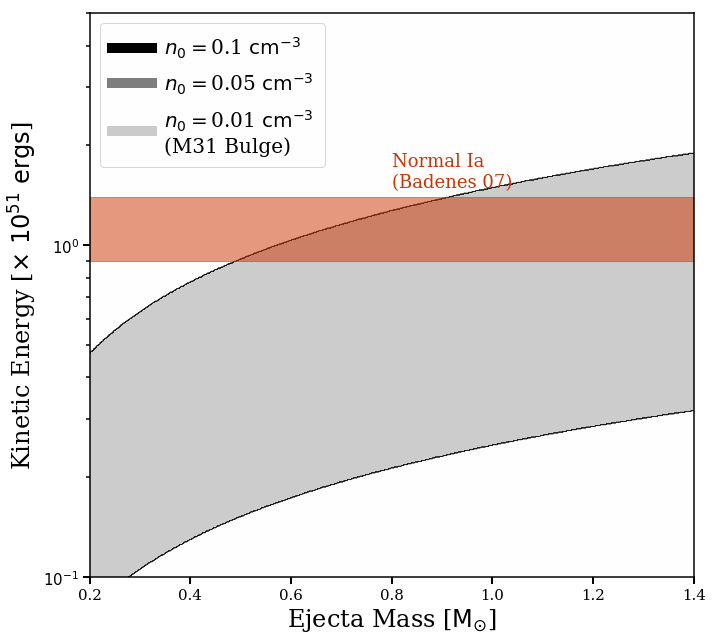

In [23]:
plt.figure(figsize=(10,9))
plt.rc('font', family='serif')
#cs = plt.contourf(M,e,stat_1,40, cmap='gray_r')
#plt.contourf(M,e,stat_2,40,cmap='gray_r',alpha=0.5)
plt.contourf(M,e,stat_3,40,cmap='gray_r',alpha=0.2)
#plt.annotate(s='', xy=(1.4,1.4), xytext=(1.4,0.9), arrowprops={'arrowstyle':'<|-|>', \
 #                                                      'lw':2, 'color':'red'})
if 1:
    plt.text(0.8, 1.5, 'Normal Ia\n(Badenes 07)', color='#CC3300', fontsize=18) 
    plt.axhspan(0.9, 1.4, color='#CC3300', alpha=0.5)
#plt.vlines(x=1.4, ymin=0.9, ymax=1.4, color='r', lw=3.0)

plt.plot([],[], 'k', lw=10.0, alpha=1.0, label=r'$n_0 = $'+'{} '.format(str(density[0]))+r'$\rm{cm^{-3}}$')
plt.plot([],[], 'k', lw=10.0, alpha=0.5, label=r'$n_0 = $'+'{} '.format(str(density[1]))+r'$\rm{cm^{-3}}$')
plt.plot([],[], 'k', lw=10.0, alpha=0.2, label=r'$n_0 = $'+'{} '.format(str(density[2]))+r'$\rm{cm^{-3}}$'+'\n(M31 Bulge)')
#plt.plot([1.4], [1.0], 'rx', mew=2.0, ms=10.0)
if showInputOnContourPlot:
    plt.axvline(x=mej, ls='-', color='r', lw=1.0)
    plt.axhline(y=e51, ls='-', color='r', lw=1.0)
    plt.plot([mej], [e51], 'ro')
plt.yscale('log')
plt.ylim(0.1,5.0)
plt.xlim(0.2, 1.4)
plt.xlabel(r'Ejecta Mass [$\rm{M_{\odot}}$]', fontsize=24)
plt.ylabel(r'Kinetic Energy [$\rm{\times\ 10^{51}\ ergs}$]', fontsize=24)
plt.legend(numpoints=1, loc=2, fontsize=20, borderpad = 0.6, handletextpad=0.6, labelspacing=0.5)
#plt.savefig(fileext_SantaCruz+'SN1885constraint.pdf', dpi=100)
